In [ ]:
import os
import cv2
import h5py
import json
import keras
import random 
import imageio
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import plotly.express as px
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Donations = pd.read_csv('/content/drive/My Drive/donorschoose/Donations.csv') 
Donations.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23
2,000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46
3,000009891526c0ade7180f8423792063,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,2016-05-15 10:23:04
4,000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38


In [ ]:
Donations.describe()

,Donation Amount,Donor Cart Sequence
count,4.687884e+06,4.687884e+06
mean,6.066879e+01,1.430545e+02
std,1.668996e+02,8.723086e+02
min,1.000000e-02,1.000000e+00
25%,1.482000e+01,1.000000e+00
50%,2.500000e+01,2.000000e+00
75%,5.000000e+01,1.200000e+01
max,6.000000e+04,1.811600e+04


In [ ]:
Donors = pd.read_csv('/content/drive/My Drive/donorschoose/Donors.csv') 
Donors.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.



,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
0,00000ce845c00cbf0686c992fc369df4,Evanston,Illinois,No,602
1,00002783bc5d108510f3f9666c8b1edd,Appomattox,other,No,245
2,00002d44003ed46b066607c5455a999a,Winton,California,Yes,953
3,00002eb25d60a09c318efbd0797bffb5,Indianapolis,Indiana,No,462
4,0000300773fe015f870914b42528541b,Paterson,New Jersey,No,075


In [ ]:
Donors.describe()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
count,2122640,1909543,2122640,2122640,1942580
unique,2122640,15204,52,2,1934
top,6c2580be269a5c95ca78d04d69b2670e,Chicago,California,No,606
freq,1,34352,294695,1910355,34628


In [ ]:
DsDns=pd.merge(Donations,Donors,on='Donor ID')
Donors=0
Donations=0

In [ ]:
DsDns.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date,Donor City,Donor State,Donor Is Teacher,Donor Zip
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57,West Jordan,Utah,No,840
1,016510b8226e70d740130ac2dcfb6c5e,f7fc7cf0b8980fb00840b4afe7c1e761,1f4b5b6e68445c6c4a0509b3aca93f38,No,807.92,20,2016-12-21 13:03:59,West Jordan,Utah,No,840
2,03c8766872a129240d14be8c385b5f1a,5015b2df023ed47e7609e91ca65f7559,1f4b5b6e68445c6c4a0509b3aca93f38,No,288.99,71,2018-01-25 17:01:41,West Jordan,Utah,No,840
3,04bfceb168d816a3cbe52f1e70d30bf0,b8871d3666020f0a527c8d6b56361d1e,1f4b5b6e68445c6c4a0509b3aca93f38,No,1200.05,38,2017-10-18 12:26:15,West Jordan,Utah,No,840
4,05a4e3418a97f2df3a6cc8ae8fbde60c,8bc4de01f65d42a611236e083c6f3473,1f4b5b6e68445c6c4a0509b3aca93f38,No,565.26,75,2018-01-25 18:00:23,West Jordan,Utah,No,840


In [ ]:
DsDns.describe()

,Donation Amount,Donor Cart Sequence
count,4.681900e+06,4.681900e+06
mean,6.067444e+01,1.432359e+02
std,1.669572e+02,8.728512e+02
min,1.000000e-02,1.000000e+00
25%,1.463000e+01,1.000000e+00
50%,2.500000e+01,2.000000e+00
75%,5.000000e+01,1.200000e+01
max,6.000000e+04,1.811600e+04


In [ ]:
GDsDns=DsDns.groupby(['Donor Zip']).sum()
GDsDns.describe()

,Donation Amount,Donor Cart Sequence
count,1.931000e+03,1.931000e+03
mean,1.412322e+05,3.170219e+05
std,4.255061e+05,4.541496e+06
min,5.000000e+00,1.000000e+00
25%,6.832500e+02,2.500000e+01
50%,8.225760e+03,6.350000e+02
75%,1.016013e+05,1.900200e+04
max,9.735845e+06,1.641814e+08


In [ ]:
GDsDns

,Donation Amount,Donor Cart Sequence
Donor Zip,,
0.0,174.00,3
7.0,125.00,3
9.0,125.71,6
10.0,5839.88,3844
11.0,150.00,4
...,...,...
k6v,115.00,3
mi,80.00,3
n19,50.00,1


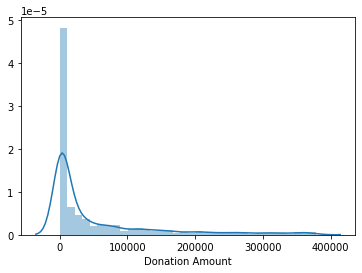

In [ ]:
#Donation Amount betweeb Q1 and Q3
a=0.1
q1 = GDsDns["Donation Amount"].quantile(a)
q3 = GDsDns["Donation Amount"].quantile(1-a)
mask = GDsDns["Donation Amount"].between(q1, q3, inclusive=True)
iqr = GDsDns.loc[mask, "Donation Amount"]
sns.distplot(iqr)

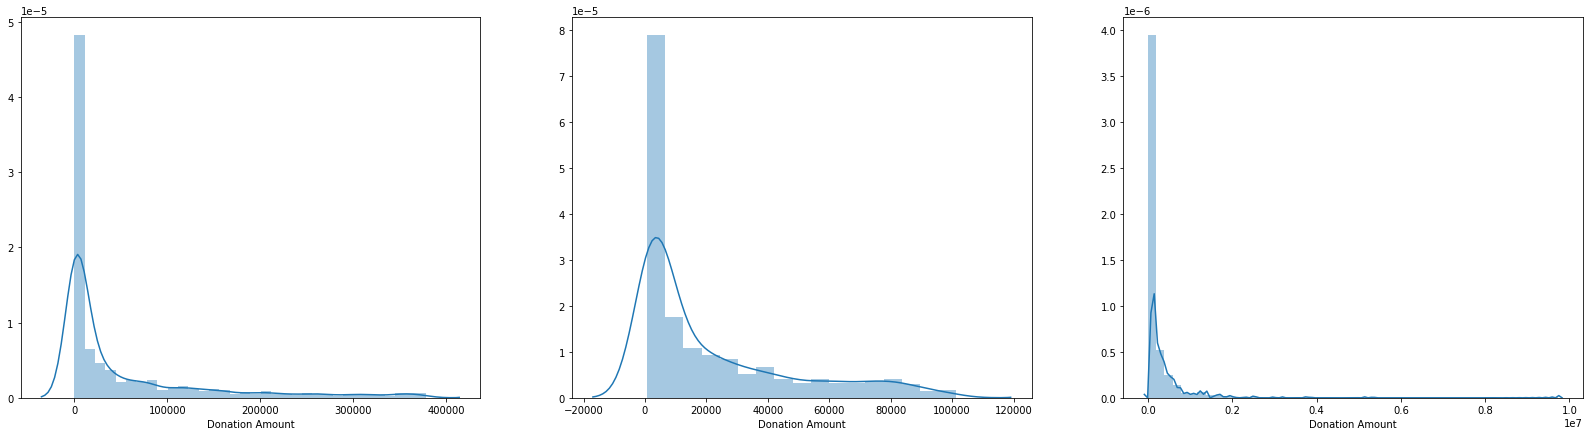

In [ ]:
f, axes = plt.subplots(1, 3,figsize=(28,7))
a=0.1
q1 = GDsDns["Donation Amount"].quantile(a)
q3 = GDsDns["Donation Amount"].quantile(1-a)
mask = GDsDns["Donation Amount"].between(q1, q3, inclusive=True)
iqr = GDsDns.loc[mask, "Donation Amount"]
sns.distplot(iqr, ax=axes[0])

a=0.25
q1 = GDsDns["Donation Amount"].quantile(a)
q3 = GDsDns["Donation Amount"].quantile(1-a)
mask = GDsDns["Donation Amount"].between(q1, q3, inclusive=True)
iqr = GDsDns.loc[mask, "Donation Amount"]
sns.distplot(iqr, ax=axes[1])

q1 = GDsDns["Donation Amount"].quantile(0.25)
q3 = GDsDns["Donation Amount"].quantile(1)
mask = GDsDns["Donation Amount"].between(q1, q3, inclusive=True)
iqr = GDsDns.loc[mask, "Donation Amount"]
sns.distplot(iqr, ax=axes[2])

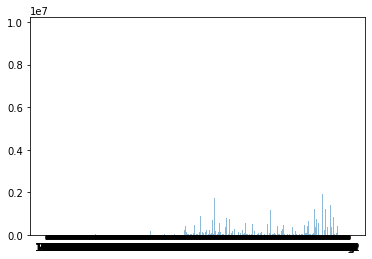

In [ ]:
# plt.plot(GDsDns.index,GDsDns["Donation Amount"])
y_pos = np.arange(len(GDsDns.index))
plt.bar(y_pos, GDsDns["Donation Amount"], align='center', alpha=0.5)
plt.xticks(y_pos, GDsDns.index)
plt.show()

In [ ]:
GDsDns=0

In [ ]:
Projects = pd.read_csv('/content/drive/My Drive/donorschoose/Projects.csv') 
Projects.head()

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,NaN
2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22
3,c614a38bb1a5e68e2ae6ad9d94bb2492,900fec9cd7a3188acbc90586a09584ef,8ed6f8181d092a8f4c008b18d18e54ad,40,Teacher-Led,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Students at our school are still working hard ...,My students need one copy of each book in The ...,Literacy & Language,"ESL, Literacy",Grades 3-5,Books,161.26,2013-01-01,2013-05-31,Fully Funded,2013-02-06
4,ec82a697fab916c0db0cdad746338df9,3b200e7fe3e6dde3c169c02e5fb5ae86,893173d62775f8be7c30bf4220ad0c33,2,Teacher-Led,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...","""Idle hands"" were something that Issac Watts s...","My students need items such as Velcro, two pou...",Special Needs,Special Needs,Grades 3-5,Supplies,264.19,2013-01-01,2013-05-30,Fully Funded,2013-01-01


In [ ]:
Projects.describe()

,Teacher Project Posted Sequence,Project Cost
count,1.110017e+06,1.110017e+06
mean,1.124050e+01,7.415240e+02
std,2.595475e+01,1.083256e+03
min,1.000000e+00,3.529000e+01
25%,1.000000e+00,3.351200e+02
50%,3.000000e+00,5.153500e+02
75%,9.000000e+00,8.675200e+02
max,4.970000e+02,2.557377e+05


In [ ]:
DsDnsPr=pd.merge(DsDns,Projects,on='Project ID')
DsDns=0
Projects=0

In [ ]:
DsDnsPr.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date,Donor City,Donor State,Donor Is Teacher,Donor Zip,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57,West Jordan,Utah,No,840,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,6,Teacher-Led,OHMS Musician Chair Cart,The music students in our classes perform freq...,The music students in our classes perform freq...,My students need a cart to help us manage our ...,Music & The Arts,Music,Grades 6-8,Other,529.68,2016-05-13,2016-09-12,Fully Funded,2016-08-23
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23,Riverton,Utah,Yes,840,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,6,Teacher-Led,OHMS Musician Chair Cart,The music students in our classes perform freq...,The music students in our classes perform freq...,My students need a cart to help us manage our ...,Music & The Arts,Music,Grades 6-8,Other,529.68,2016-05-13,2016-09-12,Fully Funded,2016-08-23
2,000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46,Riverton,Utah,No,840,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,6,Teacher-Led,OHMS Musician Chair Cart,The music students in our classes perform freq...,The music students in our classes perform freq...,My students need a cart to help us manage our ...,Music & The Arts,Music,Grades 6-8,Other,529.68,2016-05-13,2016-09-12,Fully Funded,2016-08-23
3,000009891526c0ade7180f8423792063,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,2016-05-15 10:23:04,Phoenix,Arizona,No,850,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,6,Teacher-Led,OHMS Musician Chair Cart,The music students in our classes perform freq...,The music students in our classes perform freq...,My students need a cart to help us manage our ...,Music & The Arts,Music,Grades 6-8,Other,529.68,2016-05-13,2016-09-12,Fully Funded,2016-08-23
4,000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38,Salt Lake City,Utah,Yes,841,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,6,Teacher-Led,OHMS Musician Chair Cart,The music students in our classes perform freq...,The music students in our classes perform freq...,My students need a cart to help us manage our ...,Music & The Arts,Music,Grades 6-8,Other,529.68,2016-05-13,2016-09-12,Fully Funded,2016-08-23


In [ ]:
DsDnsPr.describe()

,Donation Amount,Donor Cart Sequence,Teacher Project Posted Sequence,Project Cost
count,4.608140e+06,4.608140e+06,4.608140e+06,4.608140e+06
mean,6.104038e+01,1.434420e+02,1.204959e+01,9.230445e+02
std,1.675253e+02,8.768215e+02,2.965779e+01,3.484640e+03
min,1.000000e-02,1.000000e+00,1.000000e+00,3.529000e+01
25%,1.500000e+01,1.000000e+00,1.000000e+00,3.741100e+02
50%,2.500000e+01,2.000000e+00,3.000000e+00,5.555800e+02
75%,5.000000e+01,1.100000e+01,8.000000e+00,9.400800e+02
max,6.000000e+04,1.811600e+04,4.970000e+02,2.557377e+05


In [ ]:
Schools = pd.read_csv('/content/drive/My Drive/donorschoose/Schools.csv') 
Schools.head()

,School ID,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
0,00003e0fdd601b8ea0a6eb44057b9c5e,Capon Bridge Middle School,rural,56.0,West Virginia,26711,Capon Bridge,Hampshire,Hampshire Co School District
1,00004e32a448b4832e1b993500bf0731,The Woodlands College Park High School,urban,41.0,Texas,77384,The Woodlands,Montgomery,Conroe Ind School District
2,0002021bb799f28de224f1acc1ff08c4,Samantha Smith Elementary School,suburban,2.0,Washington,98074,Sammamish,King,Lake Washington Sch Dist 414
3,0004604f675212a8cac1161338265196,Kingsbury Country Day School,unknown,76.0,Michigan,48370,Oxford,Oakland,Michigan Dept Of Education
4,0004c9d50bcf0cea990f844e58b5e2c3,Redwater Elementary School,rural,50.0,Texas,75573,Redwater,Bowie,Redwater Ind Sch District


In [ ]:
Teachers = pd.read_csv('/content/drive/My Drive/donorschoose/Teachers.csv') 
Teachers.head()

,Teacher ID,Teacher Prefix,Teacher First Project Posted Date
0,00000f7264c27ba6fea0c837ed6aa0aa,Mrs.,2013-08-21
1,00002d44003ed46b066607c5455a999a,Mrs.,2016-10-23
2,00006084c3d92d904a22e0a70f5c119a,Mr.,2016-09-08
3,0000a9af8b6b9cc9e41f53322a8b8cf1,Ms.,2015-10-25
4,0000d4777d14b33a1406dd6c9019fe89,Ms.,2017-02-10


In [ ]:
DsDnsPrSc=pd.merge(DsDnsPr,Schools,on='School ID')
DsDnsPr=0
Schools=0

In [ ]:
DsDnsPrScTch=pd.merge(DsDnsPrSc,Teachers,on='Teacher ID')
DsDnsPrSc=0
Teachers=0

In [ ]:
DsDnsPrScTch.head(2)

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date,Donor City,Donor State,Donor Is Teacher,Donor Zip,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District,Teacher Prefix,Teacher First Project Posted Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57,West Jordan,Utah,No,840,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,6,Teacher-Led,OHMS Musician Chair Cart,The music students in our classes perform freq...,The music students in our classes perform freq...,My students need a cart to help us manage our ...,Music & The Arts,Music,Grades 6-8,Other,529.68,2016-05-13,2016-09-12,Fully Funded,2016-08-23,Oquirrh Hills Middle School,suburban,23.0,Utah,84065,Riverton,Salt Lake,Jordan School District,Mr.,2015-09-19
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23,Riverton,Utah,Yes,840,5aa86a53f658c198fd4e42c541411c76,6d5b22d39e68c656071a842732c63a0c,6,Teacher-Led,OHMS Musician Chair Cart,The music students in our classes perform freq...,The music students in our classes perform freq...,My students need a cart to help us manage our ...,Music & The Arts,Music,Grades 6-8,Other,529.68,2016-05-13,2016-09-12,Fully Funded,2016-08-23,Oquirrh Hills Middle School,suburban,23.0,Utah,84065,Riverton,Salt Lake,Jordan School District,Mr.,2015-09-19


In [ ]:
DsDnsPrScTch.to_csv('/content/drive/My Drive/donorschoose/DsDnsPrScTch.csv')

In [ ]:
statistical_var=["Donation ID","Project ID","Project ID","Donor ID","School ID","Teacher ID","Donation Amount",
                 "Project Cost","Project Type","Project Subject Category Tree","Project Subject Subcategory Tree",
                 "Project Grade Level Category","Project Resource Category","Teacher Project Posted Sequence",
                 "Donor Zip","Donor City","Donor State","Donor Cart Sequence","Donor Is Teacher",
                 "Project Current Status","School Metro Type","School Zip","School State","Teacher Prefix",
                 "School Percentage Free Lunch","Donation Included Optional Donation"]
Stat_Data=Data.loc[:,statistical_var]
Stat_Data.to_csv('/content/drive/My Drive/donorschoose/Stat_Data.csv')

# **Variables for the 3 datasets**

*   0XX - Statistical
*   1XX - Time Series
*   2XX - NLP


# Donations
***Donation ID***
1.   Donation ID	
2.   Project ID
3.   Donor ID	
4.   Donation Included Optional Donation	
5.   Donation Amount	
6.   Donor Cart Sequence
7.   Donation Received Date (Time series)

# Donor
***Donor ID***
8.   Donor City
9.   Donor State	
10.   Donor Is Teacher	
11.   Donor Zip

# Donations
***Project ID***
12.   School ID	
13.   Teacher ID
14.   Teacher Project Posted Sequence	
15.   Project Type	
16.   Project Subject Category	Tree
17.   Project Subject Subcategory Tree
18.   Project Grade Level Category
19.   Project Resource Category
20.   Project Cost
21.  Project Current Status

**extra - Time Series**
101.  Project Posted Date (Time series)
102.  Project Expiration Date (Time series)
103.  Project Fully Funded Date (Time series)


**extra - NLP**
201.   Project Title (do NLP later)	
202.   Project Essay (do NLP later)
203.   Project Short Description (do NLP later)	
204.   Project Need Statement (do NLP later)

# School
***School ID***
22.   School Metro Type
23.   School Percentage Free Lunch
24.   School Zip
25.   School State	

# Teacher
***Teacher ID***
26.   Teacher Prefix
27.   School Percentage Free Lunch

**extra - Time Series**
104.  Teacher First Project Posted Date (Time serie)
		



